In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from aslib_scenario import ASlibScenario
import copy

In [2]:
np.set_printoptions(precision=3, suppress=True)
good_scenarios = ['CSP-Minizinc-Time-2016', 'MIP-2016','QBF-2016', 'CPMP-2015']
bad_scenarios = ['ASP-POTASSCO', 'MAXSAT12-PMS', 'QBF-2011', 'SAT12-HAND', 'SAT12-ALL']

In [3]:
scenario_names = ["ASP-POTASSCO", "CSP-Minizinc-Time-2016", "MAXSAT12-PMS", "MIP-2016", "QBF-2011", "QBF-2016", "SAT12-HAND", "CPMP-2015", "SAT12-ALL"]
def read_performance_df(scenario_name):
	scenario = ASlibScenario()
	scenario.read_scenario("data/aslib_data-master/" + scenario_name)
	performance_df = scenario.performance_data
	performance_df = performance_df / (scenario.algorithm_cutoff_time * 10)
	performance_df = performance_df.transpose()
	return performance_df
def variance_of_performance_df(performance_df):
	return performance_df.var(axis=0)
def standard_deviation_of_performance_df(performance_df):
	return performance_df.std(axis=0)

In [4]:
average_variances = dict()
standard_deviations = dict()
good_variances = dict()
bad_variances = dict()
good_standard_deviations = dict()
bad_standard_deviations = dict()
for scenario_name in scenario_names:
    performance_data = read_performance_df(scenario_name)
    variances = variance_of_performance_df(performance_data)
    average_variance = variances.values
    average_variances[scenario_name] = (average_variance)
    if scenario_name in good_scenarios:
        good_variances[scenario_name]= (average_variance)
    else:
        bad_variances[scenario_name]= (average_variance)
    standard_deviation = standard_deviation_of_performance_df(performance_data).values
    if scenario_name in good_scenarios:
        good_standard_deviations[scenario_name]=(standard_deviation)
    else:
        bad_standard_deviations[scenario_name] = (standard_deviation)
    standard_deviations[scenario_name]= (standard_deviation)
    

Optional file not found: data/aslib_data-master/ASP-POTASSCO/ground_truth.arff
Have not found algorithm_cutoff_memory
Have not found features_cutoff_memory
Have not found features_stochastic
Found 37 duplicated feature vectors
Index(['FolioSuite/ASP-Comp-2007-Lparse/SLparse/CarSequencing/001.benchmark1_17classes.dlv.dat.lp.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/gryzzles.15.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/gryzzles.30.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/hampath.ngrnd.6.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/Hashiwokakero/hashiwokakero-size11-puzzle5.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/SolitaireBackward2/t29.dat.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/Su-Doku/sudoku378.lp.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/WeightBoundedDominatingSetSuite/rand_150_600_1159731678_7.gph.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/searchTest

# Variance and stdev evalution

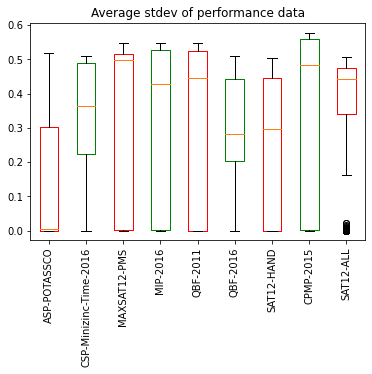

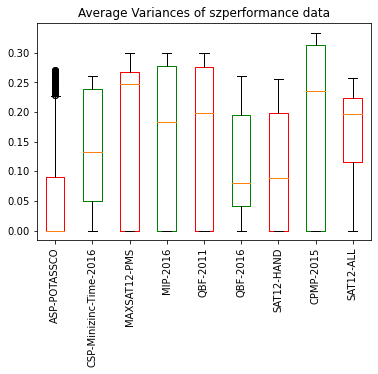

In [5]:
fig, axs = plt.subplots()
axs.set_title('Average stdev of performance data')
plots = axs.boxplot(standard_deviations.values())
axs.set_xticklabels(standard_deviations.keys(), rotation=90)

for plot, scenario_name in zip(plots['boxes'], standard_deviations.keys()):
	if scenario_name in good_scenarios:
		plot.set_color('g')
	else:
		plot.set_color('r')

fig, axs = plt.subplots()
axs.set_title('Average Variances of szperformance data')
plots = axs.boxplot(average_variances.values())
axs.set_xticklabels(average_variances.keys(), rotation=90)
for plot, scenario_name in zip(plots['boxes'], average_variances.keys()):
	if scenario_name in good_scenarios:
		plot.set_color('g')
	else:
		plot.set_color('r')


# Parwise Performance Differences

In [13]:
def generate_rolled_df(df: pd.DataFrame, column):
    instance_values_start = df[column].values
        
    instance_df = pd.DataFrame({
        column_number: np.roll(instance_values_start, column_number) for column_number in range(len(instance_values_start))
    })

    return instance_values_start, instance_df[[other_column for other_column in instance_df.columns if other_column != 0]]
def calculate_average_difference(df):
    instancewise_average_difference = []
    for collumn in df.columns:
        instance_values_start, instance_df = generate_rolled_df(df, collumn)
        for inner_column in instance_df.columns:
            instance_df[inner_column] = np.abs(instance_df[inner_column] - instance_values_start)
        instancewise_average_difference += instance_df.values.flatten().tolist()
    return np.array(instancewise_average_difference)

In [7]:
rolled_df = generate_rolled_df(performance_data, performance_data.columns[0])

In [14]:
avg_diffs = dict()
for scenario_name in scenario_names:
    performance_data = read_performance_df(scenario_name)
    avg_diffs[scenario_name] = calculate_average_difference(performance_data)
    

Optional file not found: data/aslib_data-master/ASP-POTASSCO/ground_truth.arff
Have not found algorithm_cutoff_memory
Have not found features_cutoff_memory
Have not found features_stochastic
Found 37 duplicated feature vectors
Index(['FolioSuite/ASP-Comp-2007-Lparse/SLparse/CarSequencing/001.benchmark1_17classes.dlv.dat.lp.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/gryzzles.15.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/gryzzles.30.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/HamiltonianPath/hampath.ngrnd.6.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/Hashiwokakero/hashiwokakero-size11-puzzle5.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/SolitaireBackward2/t29.dat.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/Su-Doku/sudoku378.lp.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/WeightBoundedDominatingSetSuite/rand_150_600_1159731678_7.gph.gz',
       'FolioSuite/ASP-Comp-2007-Lparse/SLparse/searchTest

In [15]:
avg_diffs['ASP-POTASSCO']

array([0.002, 0.001, 0.001, ..., 0.025, 0.027, 0.026])

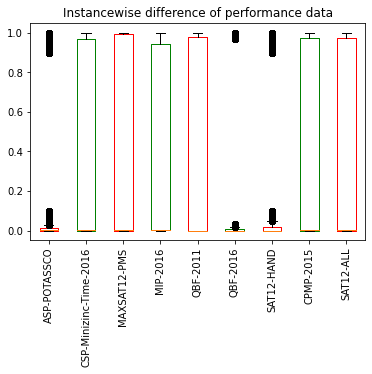

In [16]:
fig, axs = plt.subplots()
axs.set_title('Instancewise difference of performance data')
plots = axs.boxplot(avg_diffs.values())
axs.set_xticklabels(avg_diffs.keys(), rotation=90)

for plot, scenario_name in zip(plots['boxes'], avg_diffs.keys()):
	if scenario_name in good_scenarios:
		plot.set_color('g')
	else:
		plot.set_color('r')

In [17]:
bad_scenarios

['ASP-POTASSCO', 'MAXSAT12-PMS', 'QBF-2011', 'SAT12-HAND', 'SAT12-ALL']